In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings

In [2]:
df = pd.read_csv("../My Projects/Datasets/BankNote_Authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.shape

(1372, 5)

In [6]:
df.groupby("class").size()

class
0    762
1    610
dtype: int64

In [7]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


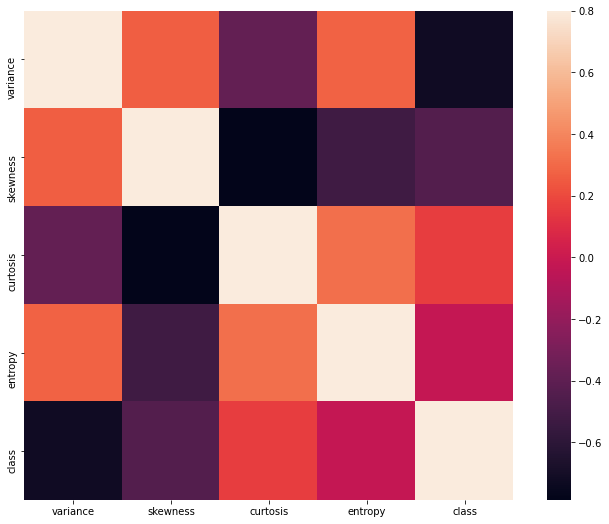

In [8]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

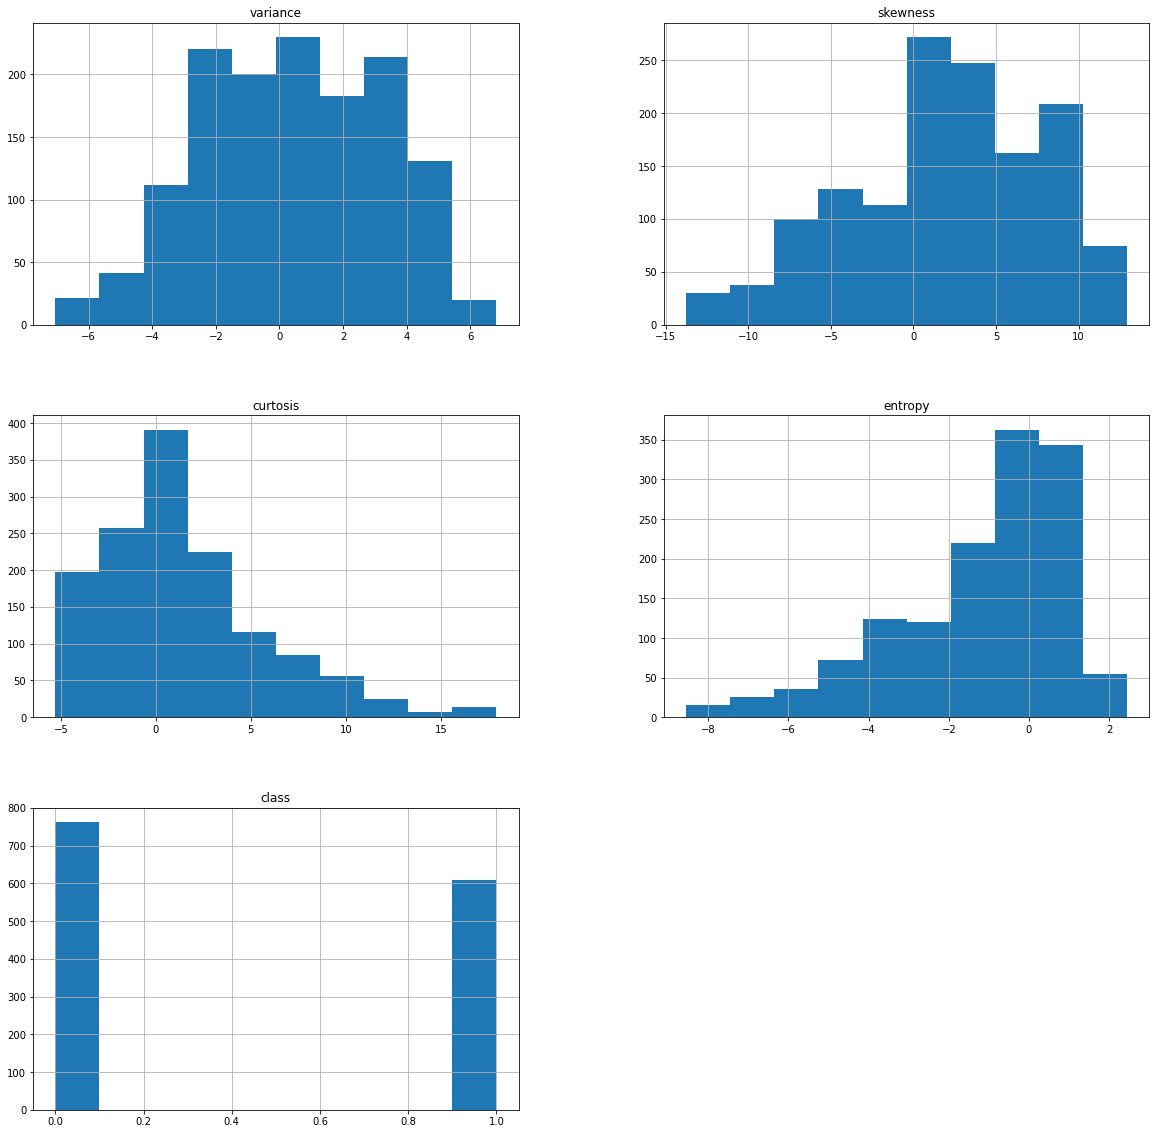

In [9]:
df.hist(figsize=(20,20))
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

variance     0
skewness     0
curtosis    59
entropy     33
class        0
dtype: int64

In [12]:
y=df["class"]
y.value_counts()


0    762
1    610
Name: class, dtype: int64

In [17]:
X= df.drop('class',axis=1)
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [18]:
X.shape


(1372, 4)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train) 

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(x_train, y_train) * 100, 2)
acc_logreg

98.12

In [34]:
List = []
i = 0.001
while(i<=10000):
    List.append(np.round(i,3))
    i *= 2
param_grid = {'C':List,}
lreg = GridSearchCV(estimator = logreg,param_grid=param_grid ,cv = 4,n_jobs = 3,scoring='roc_auc')
scores= lreg.fit(x_train,y_train)
print("Best HyperParameter: ",scores.best_params_)
print("Best Accuracy: %.2f%%"%(scores.best_score_*100))
a = lreg.best_params_



Best HyperParameter:  {'C': 32.768}
Best Accuracy: 99.97%


In [35]:
optimal_C = a.get('C')

In [36]:
best_model = LogisticRegression(C=optimal_C)

best_model.fit(x_train, y_train)

y_pred = best_model.predict(X_test)


In [37]:
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the LR classifier for C = %.3f is %f%%' % (optimal_C, acc))



The accuracy of the LR classifier for C = 32.768 is 80.582524%


In [39]:
training_accuracy = best_model.score(x_train, y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy
print("_" * 101)
print("Training Accuracy: ", training_accuracy*100)
print("Train Error: ", training_error*100)
print("Test Accuracy: ", test_accuracy*100)
print("Test Error: ", test_error*100)
print("_" * 101)


_____________________________________________________________________________________________________
Training Accuracy:  99.27083333333333
Train Error:  0.7291666666666696
Test Accuracy:  80.58252427184466
Test Error:  19.417475728155342
_____________________________________________________________________________________________________


In [40]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test, y_pred))
print("_" * 101)


_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       232
           1       1.00      0.56      0.71       180

    accuracy                           0.81       412
   macro avg       0.87      0.78      0.78       412
weighted avg       0.86      0.81      0.79       412

_____________________________________________________________________________________________________


In [42]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

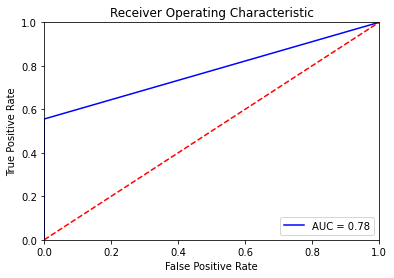

In [43]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<AxesSubplot:>

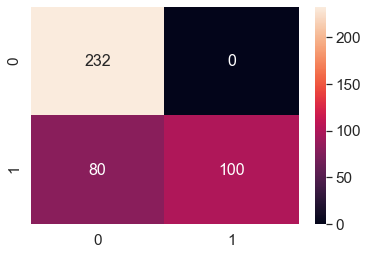

In [44]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, y_train) * 100, 2)
acc_gnb


84.06

In [48]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
best_gnb = GridSearchCV(estimator=GaussianNB(), 
                      param_grid= params_NB, 
                      cv=5,
                      scoring='accuracy', 
                      return_train_score=True)
best_gnb.fit(X_train, y_train)
best_gnb.best_params_

{'var_smoothing': 0.02848035868435802}

In [49]:
best_gnb.best_score_

0.840625

In [51]:
Y_pred1 = best_gnb.predict(X_test)
acc_gnb1 = round(best_gnb.score(X_train, y_train) * 100, 2)
acc_gnb1

84.69

In [53]:
training_accuracy2 = best_gnb.score(X_train, y_train)
training_error2 = 1 - training_accuracy2
test_accuracy2 = accuracy_score(y_test, Y_pred1)
test_error2 = 1 - test_accuracy2
print("_" * 101)
print("Training Accuracy: ", training_accuracy2*100)
print("Train Error: ", training_error2*100)
print("Test Accuracy: ", test_accuracy2*100)
print("Test Error: ", test_error2*100)
print("_" * 101)

_____________________________________________________________________________________________________
Training Accuracy:  84.6875
Train Error:  15.312499999999996
Test Accuracy:  83.49514563106796
Test Error:  16.504854368932044
_____________________________________________________________________________________________________


In [54]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test, Y_pred1))
print("_" * 101)

_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       232
           1       0.83      0.78      0.81       180

    accuracy                           0.83       412
   macro avg       0.83      0.83      0.83       412
weighted avg       0.83      0.83      0.83       412

_____________________________________________________________________________________________________


In [55]:
import sklearn.metrics as metrics
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, Y_pred1)
roc_auc2 = metrics.auc(fpr2, tpr2)

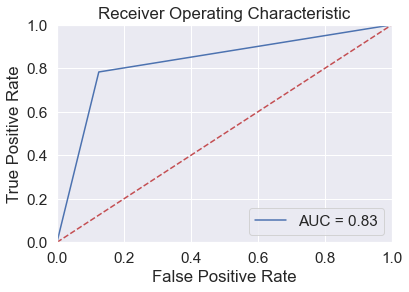

In [56]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<AxesSubplot:>

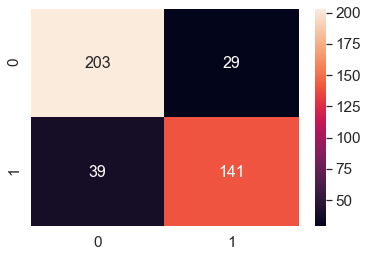

In [57]:
df_cm2 = pd.DataFrame(confusion_matrix(y_test, Y_pred1), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm2, annot=True,annot_kws={"size": 16}, fmt='g')

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred21 = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

100.0

In [74]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': range(20,30,2)}
best_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid= params_KNN, 
                      cv=2,
                      scoring='accuracy', 
                      return_train_score=True)
best_KNN.fit(X_train, y_train)
best_KNN.best_params_


{'n_neighbors': 22}

In [75]:
best_KNN.best_score_

0.984375

In [76]:
Y_pred22 = best_KNN.predict(X_test)
acc_knn1 = round(best_KNN.score(X_train, y_train) * 100, 2)
acc_knn1

99.58

In [77]:
training_accuracy11 = best_KNN.score(X_train, y_train)
training_error11 = 1 - training_accuracy11
test_accuracy11 = accuracy_score(y_test, Y_pred22)
test_error11 = 1 - test_accuracy11
print("_" * 101)
print("Training Accuracy: ", training_accuracy11*100)
print("Train Error: ", training_error11*100)
print("Test Accuracy: ", test_accuracy11*100)
print("Test Error: ", test_error11*100)
print("_" * 101)

_____________________________________________________________________________________________________
Training Accuracy:  99.58333333333333
Train Error:  0.4166666666666652
Test Accuracy:  99.75728155339806
Test Error:  0.24271844660194164
_____________________________________________________________________________________________________


In [78]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test, Y_pred22))
print("_" * 101)

_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       0.99      1.00      1.00       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

_____________________________________________________________________________________________________


In [79]:
import sklearn.metrics as metrics
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, Y_pred22)
roc_auc2 = metrics.auc(fpr2, tpr2)

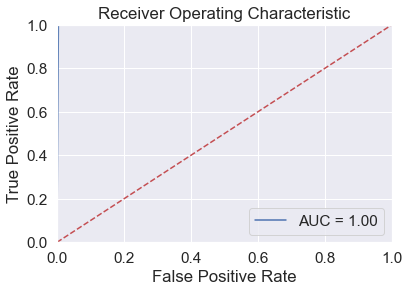

In [80]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<AxesSubplot:>

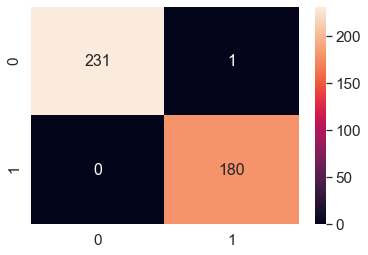

In [81]:
df_cm2 = pd.DataFrame(confusion_matrix(y_test, Y_pred22), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm2, annot=True,annot_kws={"size": 16}, fmt='g')